In [503]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)


In [504]:
%matplotlib inline
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

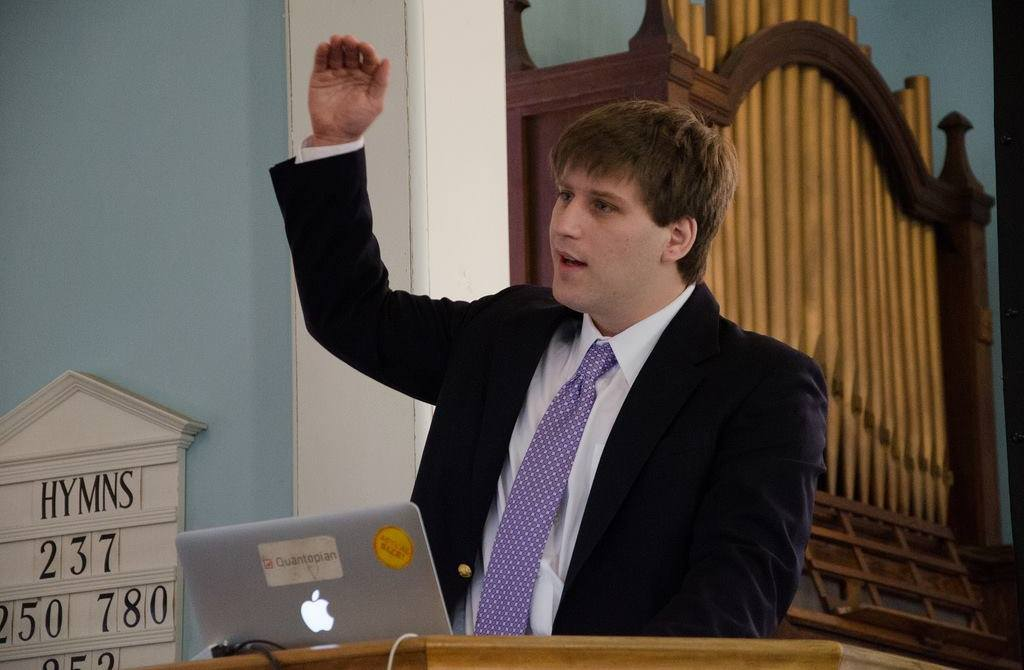

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [505]:
assert ran_the_first_cell, "Oh noes!"

In [506]:
assert ran_the_first_cell, "O:"

In [507]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [508]:
l2 = ["zero", 1, 2 , 3.0, "four"]
l2

['zero', 1, 2, 3.0, 'four']

In [509]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print ("first:", first)
print ("second:", second)

first: 1
second: two


In [510]:
f = l2[0]
t = l2[2]

print ("zero ?", f)
print ("Integer :", t)


zero ? zero
Integer : 2


In [511]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [512]:
Last = l2[-1]
BLast= l2[-2]
print("last:", Last)
print("second to last:", BLast)

last: four
second to last: 3.0


In [513]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [514]:
sl = l2[1:3]
sl

[1, 2]

In [515]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [516]:
p2 = l2[:2]
p2

['zero', 1]

In [517]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [518]:
u3 = l2[2:]
u3

[2, 3.0, 'four']

In [519]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [520]:
l2 = ['A', 'B', 'C', 'D', 'E']
l2[0:5:2]

['A', 'C', 'E']

In [521]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [522]:
l2[::-1]

['E', 'D', 'C', 'B', 'A']

In [523]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [524]:
l= [6, 7, 8, 9]
print("Ahora:", l)
l.append(10)
print("Ahora:", l)

Ahora: [6, 7, 8, 9]
Ahora: [6, 7, 8, 9, 10]


In [525]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [526]:
l = [6, 7, 8, 9]
[y * 3 for y in l]

[18, 21, 24, 27]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [527]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [528]:
# Mi ejemplo
nombres = {'Antonio': 'Perez', 'Alfonso': 'Lopez', 'Camila': 'Vega'}
nombres

{'Alfonso': 'Lopez', 'Antonio': 'Perez', 'Camila': 'Vega'}

In [529]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [530]:
nombres['Sebastian'] = 'Montes'
nombres

{'Alfonso': 'Lopez',
 'Antonio': 'Perez',
 'Camila': 'Vega',
 'Sebastian': 'Montes'}

In [531]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [532]:
del nombres['Sebastian']
nombres

{'Alfonso': 'Lopez', 'Antonio': 'Perez', 'Camila': 'Vega'}

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [533]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [534]:
a2 = [[3, 5, 1],
     [7, 3, 2],
     [9, 0, 3]]

b2 = [[1, 6, 3],
     [9, 6, 2]]

In [535]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [536]:
def mm(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [537]:
%%time

matmul(a, b)

CPU times: user 38 µs, sys: 2 µs, total: 40 µs
Wall time: 44.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [538]:
%%time

mm(a2, b2)

CPU times: user 29 µs, sys: 2 µs, total: 31 µs
Wall time: 36 µs


[[48, 48, 19], [34, 60, 27], [9, 54, 27]]

In [539]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out



In [540]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.9 s, sys: 49.8 ms, total: 10.9 s
Wall time: 11 s


In [541]:
import random
def rm(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out


In [542]:
%%time
r1 = rm(300, 200)
r2 = rm(200, 300)
x2 = mm(r1, r2)

CPU times: user 5.33 s, sys: 13.7 ms, total: 5.35 s
Wall time: 5.38 s


In [543]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [544]:
def pdp(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [545]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [546]:
ld1 = [float(i) for i in range(1000)]
ad1 = np.array(ld1)

In [547]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 14.4 ms, sys: 0 ns, total: 14.4 ms
Wall time: 15.8 ms


333328333350000.0

In [548]:
%%time
pdp(ld1, ld1)

CPU times: user 165 µs, sys: 8 µs, total: 173 µs
Wall time: 179 µs


332833500.0

## Why is the Python Version so Much Slower?

In [549]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [550]:
def me(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

me([1, 3, 5, 7], [2, 3 + 0j, 2.0, 'two'])
#[type(x) for x in _]

[2, (9+0j), 10.0, 'twotwotwotwotwotwotwo']

In [551]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [552]:
sc = 'c + d * t'
bc = compile(sc, '', 'eval')
import dis; dis.dis(bc)

  1           0 LOAD_NAME                0 (c)
              2 LOAD_NAME                1 (d)
              4 LOAD_NAME                2 (t)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [553]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [554]:
data2 = np.array([1,3,17,4])
data2

array([ 1,  3, 17,  4])

In [555]:
data + data

array([2, 4, 6, 8])

In [556]:
data2 + data2

array([ 2,  6, 34,  8])

In [557]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.09 ms, sys: 1.01 ms, total: 2.1 ms
Wall time: 2.23 ms


333328333350000.0

In [558]:
%%time
(ad1 * ad1).sum()

CPU times: user 79 µs, sys: 4 µs, total: 83 µs
Wall time: 88.2 µs


332833500.0

In [559]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.73 ms, sys: 4.96 ms, total: 6.69 ms
Wall time: 7.68 ms


333328333350000.0

In [560]:
%%time
ad1.dot(ad1)

CPU times: user 23 µs, sys: 1 µs, total: 24 µs
Wall time: 27.9 µs


332833500.0

In [561]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [562]:
# We also can't grow an array once it's created.
#data.append(3)

In [563]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [564]:
dxd = data2.reshape(2,2)
dxd

array([[ 1,  3],
       [17,  4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [565]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [566]:
ar = np.array([3, 5, 7, 9, 2, 4], dtype='int16').reshape(2, 3)
print("Array:\n", ar, sep='')
print("===========")
print("DType:", ar.dtype)
print("Shape:", ar.shape)
print("Strides:", ar.strides)
print("Data:", ar.data.tobytes())

Array:
[[3 5 7]
 [9 2 4]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x03\x00\x05\x00\x07\x00\t\x00\x02\x00\x04\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [567]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [568]:
d2 = np.arange(10).reshape(2, 5)
d2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [569]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [570]:
d2 * d2

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [571]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [572]:
np.sqrt(d2)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ]])

In [573]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [574]:
(d2 % 4) == 0

array([[ True, False, False, False,  True],
       [False, False, False,  True, False]])

In [575]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [576]:
((d2 % 3) == 0) & ((d2 % 6) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False]])

In [577]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [578]:
d2 @ d2.T

array([[ 30,  80],
       [ 80, 255]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [579]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [580]:
sin = np.sin(np.linspace(2, 3.14, 11))
ccos = np.cos(np.linspace(2, 3.14, 11))
sin

array([0.90929743, 0.85605716, 0.79170362, 0.71707223, 0.63313186,
       0.54097222, 0.44178971, 0.33687192, 0.22758089, 0.11533541,
       0.00159265])

In [581]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [582]:
s[1]

2

In [583]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [584]:
s[:2] 

a    1
b    2
dtype: int64

In [585]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [586]:
s[6:] 

Series([], dtype: int64)

In [587]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [588]:
s[::2] 

a    1
c    3
e    5
dtype: int64

In [589]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [590]:
print("sin:\n", sin)
print("sin > 0.2:\n", sin > 0.2)
print("sin[sin > 0.2]:\n", sin[sin > 0.2])

sin:
 [0.90929743 0.85605716 0.79170362 0.71707223 0.63313186 0.54097222
 0.44178971 0.33687192 0.22758089 0.11533541 0.00159265]
sin > 0.2:
 [ True  True  True  True  True  True  True  True  True False False]
sin[sin > 0.2]:
 [0.90929743 0.85605716 0.79170362 0.71707223 0.63313186 0.54097222
 0.44178971 0.33687192 0.22758089]


In [591]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [592]:
print(sin)
sin[[2, 3, 6]] 

[0.90929743 0.85605716 0.79170362 0.71707223 0.63313186 0.54097222
 0.44178971 0.33687192 0.22758089 0.11533541 0.00159265]


array([0.79170362, 0.71707223, 0.44178971])

In [593]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [594]:
ud = np.array([-6, -1, 9, 1, 3, 2])

In [595]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [596]:
si = np.argsort(ud)
si

array([0, 1, 3, 5, 4, 2])

In [597]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [598]:
ud[si] 

array([-6, -1,  1,  2,  3,  9])

In [599]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [600]:
mc = np.array([12, 6, 10, 13, 71]) 
a = np.array(['A', 'b', 'C', 'd', 'E'])

In [601]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [602]:
sbm = np.argsort(mc)
a[sbm] 

array(['b', 'C', 'A', 'd', 'E'], dtype='<U1')

In [603]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [604]:
print("Fechas:\n", repr(event_dates))
print("Valores:\n", repr(event_values))
print("Calendario:\n", repr(calendar))

Fechas:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Valores:
 array([10, 15, 20])
Calendario:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [605]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [606]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [607]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [608]:
data2 = np.arange(20).reshape(5, 4)
data2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [609]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [610]:
data2[:5, :4]  

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [611]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [612]:
data2[:3, [0, -2]]  

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [613]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [614]:
d2[(d2[:, 0] % 3) == 0]  

array([[0, 1, 2, 3, 4]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [615]:
import numpy as np

def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [616]:
def varianza(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [617]:
variance(np.random.standard_normal(1000))

0.9904394558263779

In [618]:

varianza(np.random.standard_normal(1000))

0.9146730363626168

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [619]:
data = np.arange(30)
data.mean()

14.5

In [620]:
data2 = np.arange(32)
data2.mean()

15.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [621]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [622]:
data2 = np.arange(25).reshape(5, 5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [623]:
data.mean()

14.5

In [624]:
data2.mean()

12.0

In [625]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [626]:
data2.mean(axis=0)

array([10., 11., 12., 13., 14.])

In [627]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [628]:
data2.mean(axis=1)

array([ 2.,  7., 12., 17., 22.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [629]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [630]:
f = np.array([4, 3, 2, 1])
c = np.array([[1], [2], [3]])
print("Row:\n", f, sep='')
print("Column:\n", c, sep='')

Row:
[4 3 2 1]
Column:
[[1]
 [2]
 [3]]


In [631]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [632]:

f + c

array([[5, 4, 3, 2],
       [6, 5, 4, 3],
       [7, 6, 5, 4]])

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [633]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [634]:
print("Data:\n", data2, sep='')
print("Mean:\n", data2.mean(axis=0), sep='')
print("Data - Mean:\n", data2 - data2.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Mean:
[10. 11. 12. 13. 14.]
Data - Mean:
[[-10. -10. -10. -10. -10.]
 [ -5.  -5.  -5.  -5.  -5.]
 [  0.   0.   0.   0.   0.]
 [  5.   5.   5.   5.   5.]
 [ 10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [635]:
import pandas as pd

s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [636]:
s2 = pd.Series(index=['a','c','e','g','i'], data=[11, 22, 33, 44, 55])
s2

a    11
c    22
e    33
g    44
i    55
dtype: int64

In [637]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [638]:
print("The index is:", s2.index)
print("The values are:", s2.values)

The index is: Index(['a', 'c', 'e', 'g', 'i'], dtype='object')
The values are: [11 22 33 44 55]


In [639]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [640]:
s2.iloc[2]

33

In [641]:
# ... or by label.
s.loc['a']

1

In [642]:
s2.loc['c']

22

In [643]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [644]:
s2.iloc[:4]

a    11
c    22
e    33
g    44
dtype: int64

In [645]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [646]:
s2.loc[:'e']

a    11
c    22
e    33
dtype: int64

In [647]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [648]:
s2.iloc[[1, -1]]

c    22
i    55
dtype: int64

In [649]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [650]:
s2.loc[s2 > 6]

a    11
c    22
e    33
g    44
i    55
dtype: int64

In [651]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [652]:
s22 = pd.Series({'a': 20.0, 'c': 40.0, 'e': 1.0, 'g': 75.0})
s22

a    20.0
c    40.0
e     1.0
g    75.0
dtype: float64

In [653]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [654]:
s2 + s22

a     31.0
c     62.0
e     34.0
g    119.0
i      NaN
dtype: float64

In [655]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [656]:
(s2 + s22).fillna(0.0)

a     31.0
c     62.0
e     34.0
g    119.0
i      0.0
dtype: float64

In [657]:
import io
import urllib
import urllib.request
import pandas as pd
import numpy as np
url = f'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1585792593&period2=1617328593&interval=1d&events=history&includeAdjustedClose=true'

with urllib.request.urlopen(url) as response:
    sourcePage = response.read().decode()

aapl = pd.read_csv(io.StringIO(sourcePage), parse_dates=['Date'], index_col='Date', sep=",")
print(aapl.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-04-02  60.084999  61.287498  59.224998  61.232498  60.761501  165934000
2020-04-03  60.700001  61.424999  59.742500  60.352501  59.888275  129880000
2020-04-06  62.724998  65.777496  62.345001  65.617500  65.112770  201820400
2020-04-07  67.699997  67.925003  64.750000  64.857498  64.358627  202887200
2020-04-08  65.684998  66.842499  65.307503  66.517502  66.005852  168895200


In [658]:
url2 = f'https://query1.finance.yahoo.com/v7/finance/download/FB?period1=1586485128&period2=1618021128&interval=1d&events=history&includeAdjustedClose=true'

with urllib.request.urlopen(url2) as response:
    sourcePage2 = response.read().decode()

fb = pd.read_csv(io.StringIO(sourcePage2), parse_dates=['Date'], index_col='Date', sep=",")
print(fb.head())

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-13  173.669998  175.000000  ...  174.789993  19355400
2020-04-14  178.979996  181.229996  ...  178.169998  21011800
2020-04-15  175.190002  178.190002  ...  176.970001  17423000
2020-04-16  177.949997  178.050003  ...  176.250000  23593200
2020-04-17  179.199997  180.279999  ...  179.240005  20974800

[5 rows x 6 columns]


In [659]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2020-04-02,60.084999,61.287498
2020-04-03,60.700001,61.424999


In [660]:
fb.iloc[:4, :3]

,Open,High,Low
Date,,,
2020-04-13,173.669998,175.000000,169.449997
2020-04-14,178.979996,181.229996,176.619995
2020-04-15,175.190002,178.190002,172.820007
2020-04-16,177.949997,178.050003,172.509995


In [661]:
aapl.loc[pd.Timestamp('2020-04-01'):pd.Timestamp('2020-04-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2020-04-02,61.232498,165934000
2020-04-03,60.352501,129880000


In [662]:
fb.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-05-01'), ['Close', 'Volume']]

,Close,Volume
Date,,
2020-04-13,174.789993,19355400
2020-04-14,178.169998,21011800
2020-04-15,176.970001,17423000
2020-04-16,176.250000,23593200
2020-04-17,179.240005,20974800
2020-04-20,178.240005,16110700
2020-04-21,170.800003,24850500
2020-04-22,182.279999,33242000
2020-04-23,185.130005,21426600


# Rolling Operations

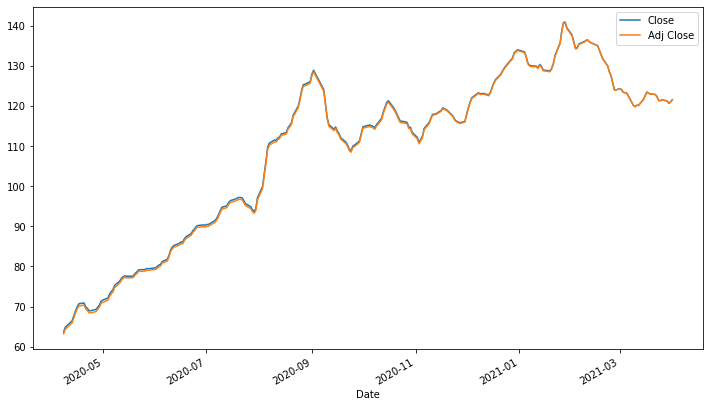

In [663]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

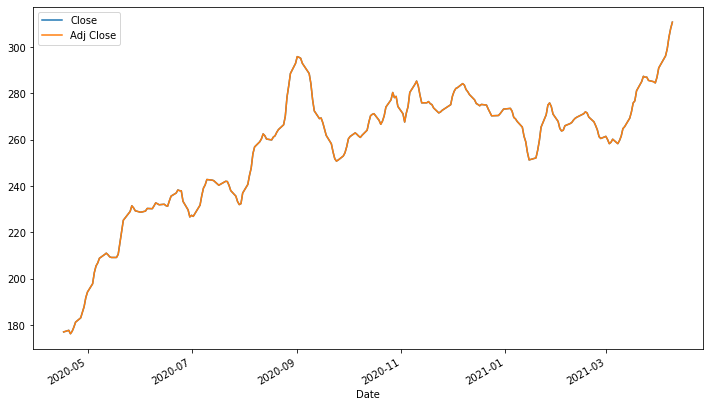

In [664]:
fb.rolling(5)[['Close', 'Adj Close']].mean().plot();

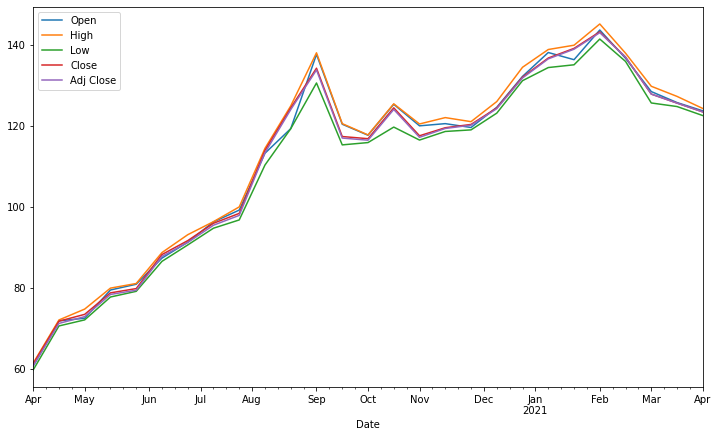

In [665]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

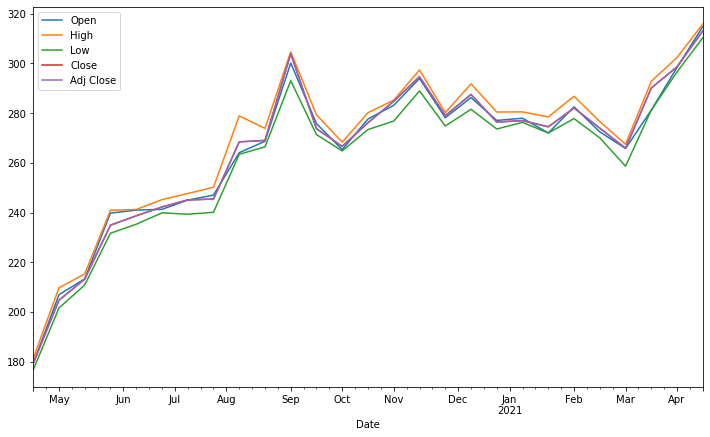

In [666]:
fb.drop('Volume', axis=1).resample('2W').max().plot();

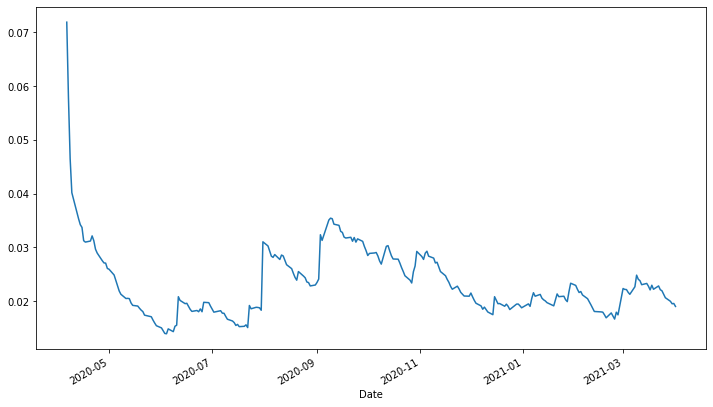

In [667]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

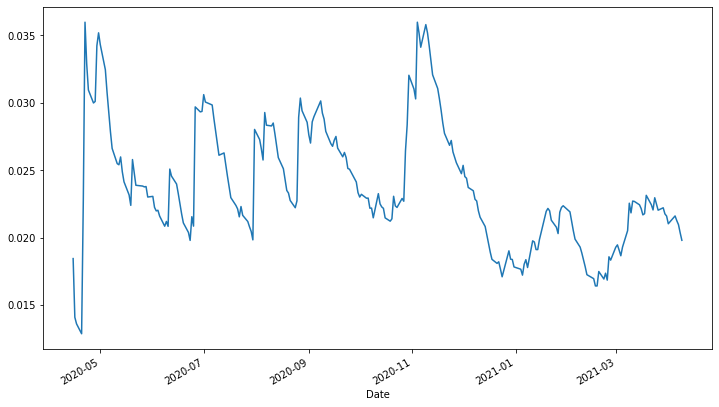

In [668]:
fb['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [669]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [670]:
avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [671]:
url3 = f'https://www.datos.gov.co/api/views/hmcn-jenj/rows.csv?accessType=DOWNLOAD'

with urllib.request.urlopen(url3) as response:
    sourcePage3 = response.read().decode()



In [672]:
bme = pd.read_csv(io.StringIO(sourcePage3), sep=",")
bme.head()

,Identificador_Registro,Num_cuestionario,Num_depto_DIVIPOLA,Nombre_Depto,Tipo_Empresa,Factor_Ponderación,Pregunta.1,Pregunta.1.4,Pregunta.2,Pregunta.3,Pregunta.4,Pregunta.5,Pregunta.6,Pregunta.7,Pregunta.8.1,Pregunta.8.2,Pregunta.8.3,Pregunta.8.4,Pregunta.8.5,Pregunta.9.a,Pregunta.10.a,Pregunta.11.a,Pregunta.9.b,Pregunta.10.b,Pregunta.11.b,Pregunta.9.c,Pregunta.10.c,Pregunta.11.c,Pregunta.9.d,Pregunta.10.d,Pregunta.11.d,Pregunta.9.e,Pregunta.12.1,Pregunta.12.2,Pregunta.12.3,Pregunta.12.4,Pregunta.12.5,Pregunta.12.6,Pregunta.12.7,Pregunta.12.8,...,Pregunta.64.5,Pregunta.64.6,Pregunta.64.7,Pregunta.64.8,R65,Pregunta.65.1,Pregunta.65.2,Pregunta.65.3,Pregunta.65.4,Pregunta.66,Pregunta.67.1,Pregunta.67.2,Pregunta.67.3,Pregunta.67.4,Pregunta.68,Pregunta.69,Pregunta.70.1,Pregunta.70.2,Pregunta.70.3,Pregunta.70.4,Pregunta.70.5,Pregunta.70.6,Pregunta.70.7,Pregunta.70.8,Pregunta.70.9,Pregunta.71,Pregunta.72.1,Pregunta.72.2,Pregunta.72.3,Pregunta.72.4,Pregunta.72.5,Pregunta.72.89,Pregunta.73.1,Pregunta.73.2,Pregunta.73.3,Pregunta.73.4,Pregunta.73.5,Pregunta.73.6,Pregunta.73.7,Pregunta.73.8
0,44919,5230.0,11,BOGOTÁ,2,554494179,1,NaN,2,3,6,6,2,NaN,NaN,NaN,3.0,NaN,NaN,1,1.0,3.0,1,5.0,4.0,1,4.0,4.0,1,3.0,4.0,2,1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,1,2,2,2,2,NaN,2.0,NaN,NaN,1,1.0,NaN,NaN,NaN,5,4,5,5,5,5,4,5,5,5,4,1,1.0,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,6.0,7.0,8.0
1,43102,5234.0,11,BOGOTÁ,2,1398726324,2,NaN,2,4,5,4,1,2.0,NaN,NaN,NaN,NaN,NaN,1,5.0,4.0,1,5.0,4.0,1,5.0,4.0,2,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99,99,99,99,2,NaN,2.0,NaN,NaN,1,NaN,2.0,NaN,NaN,4,3,4,4,4,2,2,1,1,3,2,1,1.0,2.0,3.0,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0
2,44630,14044.0,11,BOGOTÁ,2,338678654,3,NaN,2,7,3,7,1,1.0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,1,4.0,4.0,1,4.0,4.0,1,4.0,4.0,2,1,2.0,NaN,NaN,5.0,6.0,NaN,NaN,...,2,2,2,2,3,NaN,NaN,3.0,NaN,1,1.0,2.0,NaN,NaN,5,3,5,5,5,5,3,3,5,5,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44645,14046.0,11,BOGOTÁ,2,659893899,4,44.0,2,5,89,4,1,2.0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,2,NaN,NaN,1,5.0,4.0,2,NaN,NaN,2,1,2.0,3.0,4.0,NaN,6.0,NaN,NaN,...,2,2,2,2,3,NaN,NaN,3.0,NaN,2,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,4,4,4,4,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
4,43726,14053.0,11,BOGOTÁ,2,1398726324,1,NaN,2,7,89,6,1,1.0,NaN,NaN,NaN,NaN,NaN,1,5.0,4.0,1,5.0,4.0,1,5.0,4.0,1,5.0,4.0,2,1,2.0,3.0,4.0,5.0,NaN,NaN,NaN,...,1,2,1,2,2,NaN,2.0,NaN,NaN,1,NaN,2.0,NaN,NaN,5,3,3,4,5,3,3,1,3,3,1,1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0


In [673]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [674]:
bme.dtypes

Identificador_Registro      int64
Num_cuestionario          float64
Num_depto_DIVIPOLA          int64
Nombre_Depto               object
Tipo_Empresa                int64
                           ...   
Pregunta.73.4             float64
Pregunta.73.5             float64
Pregunta.73.6             float64
Pregunta.73.7             float64
Pregunta.73.8             float64
Length: 503, dtype: object

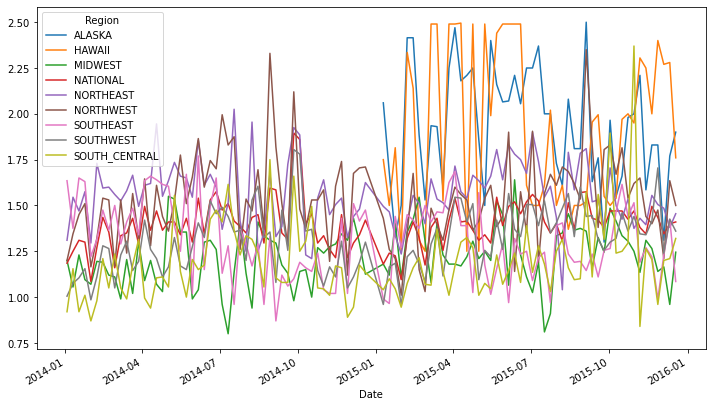

In [675]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [676]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

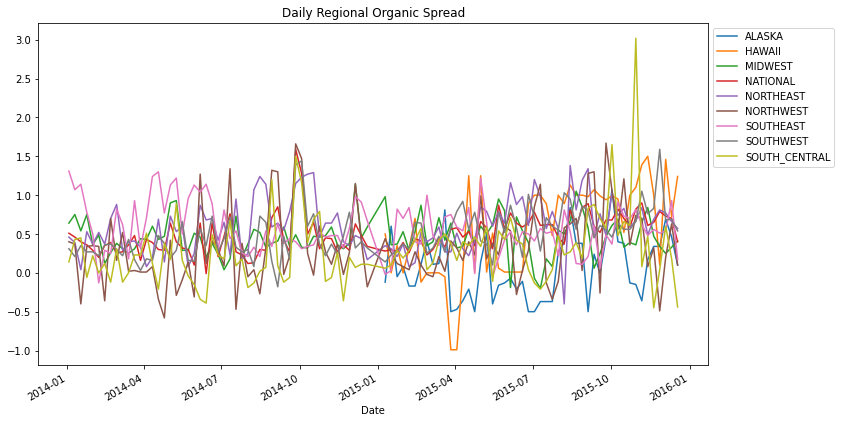

In [677]:
import matplotlib.pyplot as plt

organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [678]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


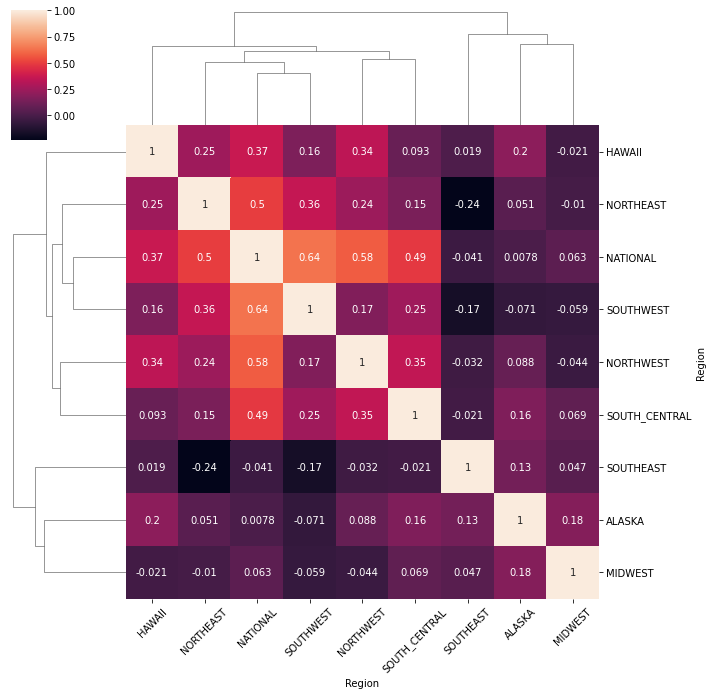

In [679]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!